## Importing Libaries

In [242]:
## Regular Expression
import re

## Arrays
import numpy as np

## DataFrames
import pandas as pd

## Visualizations
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import matplotlib.colors as colors

## Scrapping
from bs4 import BeautifulSoup

## NLP
import contractions
import inflect
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

## Modeling
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

## Warnings
import warnings
from scipy import stats
warnings.filterwarnings('ignore')

## Display Settings

In [243]:
pd.set_option('display.width', 800)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_colwidth', 1000)

sns.set_style('white')

## Visualization Settings

In [244]:
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]
 
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.
for i in range(len(tableau20)):
    r, g, b = tableau20[i]
    tableau20[i] = (r / 255., g / 255., b / 255.)
# Adapted from http://spartanideas.msu.edu/2014/06/28/how-to-make-beautiful-data-visualizations-in-python-with-matplotlib/


def visualization_settings():
    plt.clf()
    sns.set_style({"xtick.major.size":30,"ytick.major.size":30})
    plt.figure(figsize=(16,8))
    sns.set(font_scale=1.4)

In [245]:
df = pd.read_csv('mbti_1.csv')

In [246]:
df.head()

type  \
0  INFJ   
1  ENTP   
2  INTP   
3  INTJ   
4  ENTJ   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     posts  
0  'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206|||Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...|||84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04/round-home-design.jpg ...  
1  'I'm finding the lack of me in these posts very alarming.|||Sex can be boring if it's in the same position often. For example me and my girlfriend are currently in an environment where we have to creatively use cowgirl and missionary. There isn't enough...|||Giving new meaning to 'Game' theory.|||Hello *ENTP Grin*  That's all it takes. Than we converse and they do most of the flirting while I acknowledge their presence and return their words with smooth wordplay and more cheeky grins.|||This + Lack of Balance and Hand Eye Coordination.|||Real IQ test I score 127. Internet IQ tests are funny. I score 140s or higher.  Now, like the former responses of this thread I will mention that I don't believe in the IQ test. Before you banish...|||You know you're an ENTP when you vanish from a site for a year and a half, return, and find people are still commenting on your posts and liking your ideas/thoughts. You know you're an ENTP when you...|||http://img188.imageshack.us/img188/6422/6020d1f...  
2  'Good one  _____   https://www.youtube.com/watch?v=fHiGbolFFGw|||Of course, to which I say I know; that's my blessing and my curse.|||Does being absolutely positive that you and your best friend could be an amazing couple count? If so, than yes.   Or it's more I could be madly in love in case I reconciled my feelings (which at...|||No, I didn't; thank you for a link!|||So-called Ti-Si loop (and it can stem from any current topic/obsession) can be deadly. It's like when you're stuck in your own thoughts, and your mind just wanders in circles. Feels truly terrible. ...|||Have you noticed how peculiar vegetation can be? All you have to do is look down at the grass: dozens of different plant species there.    And now imagine that hundreds of years later (when/if soil...|||The Smiths – Never Had No One Ever|||I often find myself spotting faces on marble tiles/wood.|||This 5 year-old sentence is an incredibly a

In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
type     8675 non-null object
posts    8675 non-null object
dtypes: object(2)
memory usage: 135.6+ KB


As seen from the above info, there is no missing/ null columns.

In [248]:
df.shape

(8675, 2)

## Sample List of Posts

In [249]:
[p.split('|||') for p in df.head(3).posts]

[["'http://www.youtube.com/watch?v=qsXHcwe3krw",
  'http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg',
  'enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks',
  'What has been the most life-changing experience in your life?',
  'http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.',
  'May the PerC Experience immerse you.',
  'The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206',
  "Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...",
  '84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04

The number of users is __8675__

In [250]:
personalities = {'I':'Introversion', 'E':'Extroversion', 'N':'Intuition', 'S':'Sensing', 
                 'T':'Thinking',     'F': 'Feeling',     'J':'Judging',   'P': 'Perceiving'}

In [251]:
## Counting personality types

# First way
per_types = df.groupby('type').agg({'type':'count'})

# Second way
personality_types = df['type'].value_counts()
personality_types

INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: type, dtype: int64

## EDA

<Figure size 432x288 with 0 Axes>

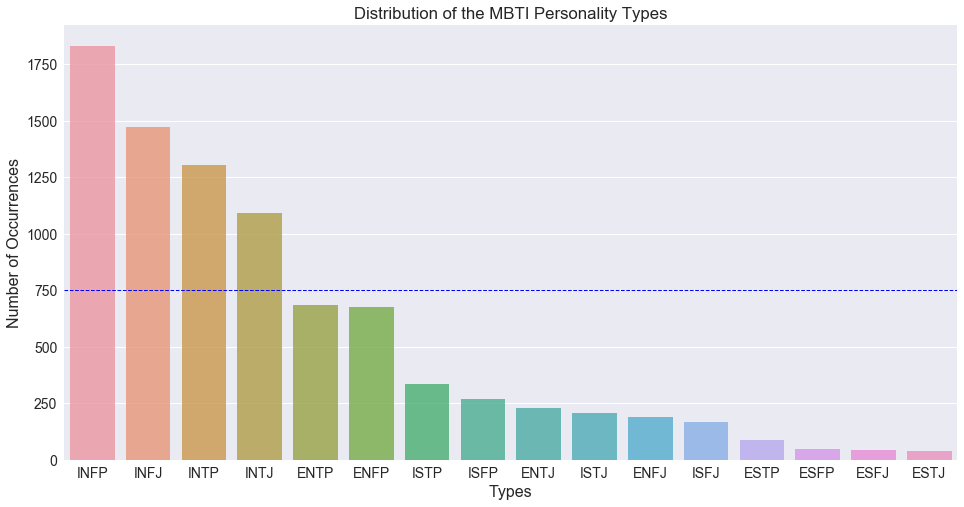

In [252]:
## Personality types
personality_types = df['type'].value_counts()

visualization_settings()
sns.barplot(personality_types.index, personality_types.values, alpha=0.8)
sns.set_style('white')
sns.despine()

# The blue line
plt.axhline(y=750, color="blue", linestyle='--', linewidth=1)

# Label customizing
plt.ylabel('Number of Occurrences', fontsize=16)
plt.xlabel('Types', fontsize=16)
plt.title("Distribution of the MBTI Personality Types")
plt.show()

Only traning set was used for this graphic. Blue line shows the number of 750. According to the graphic __`INFP, INFJ, INTP and INTJ`__ are the most common personality types and all of them are __Intoversion__ type peoples. This is __`unbalanced`__ data as we can understand from the graphic.

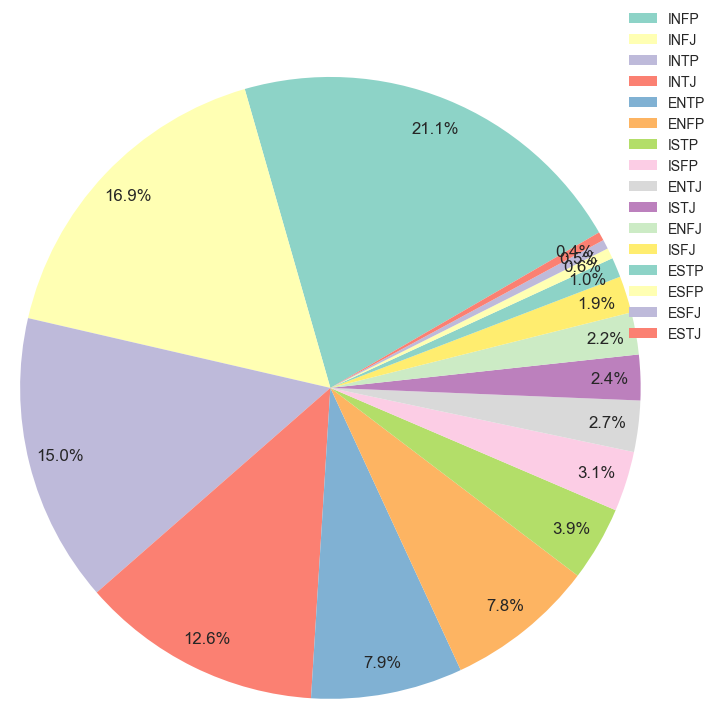

In [253]:

# Pie chart
labels = personality_types.index
values = personality_types.values

#colors
color_list = plt.cm.Set3(np.linspace(0, 1, 12))
plt.figure(figsize=(10,10))

plt.pie(values, colors = color_list, autopct='%1.1f%%', startangle=30, pctdistance=0.9, labeldistance=4, radius=1.2)
plt.legend(personality_types.index, loc=1, bbox_to_anchor=(1.1, 1.1))
plt.rcParams['font.size'] = 11.5
plt.tight_layout()

The __most common__ personality type is `INFP` with about 21% and the __least common__ one is `ESTJ` with around 0.3%.

In [254]:
mapping = {
    'I': 'Introversion',
    'E': 'Extroversion',
    'N': 'Intuition',
    'S': 'Sensing',
    'T': 'Thinking',
    'F': 'Feeling',
    'J': 'Judging',
    'P': 'Perceiving',
}

In [255]:
temp_df = pd.DataFrame()
for c in 'INTJESFP':
    temp_df[c] = df['type'].map(lambda x: 1 if c in x else 0)

<Figure size 432x288 with 0 Axes>

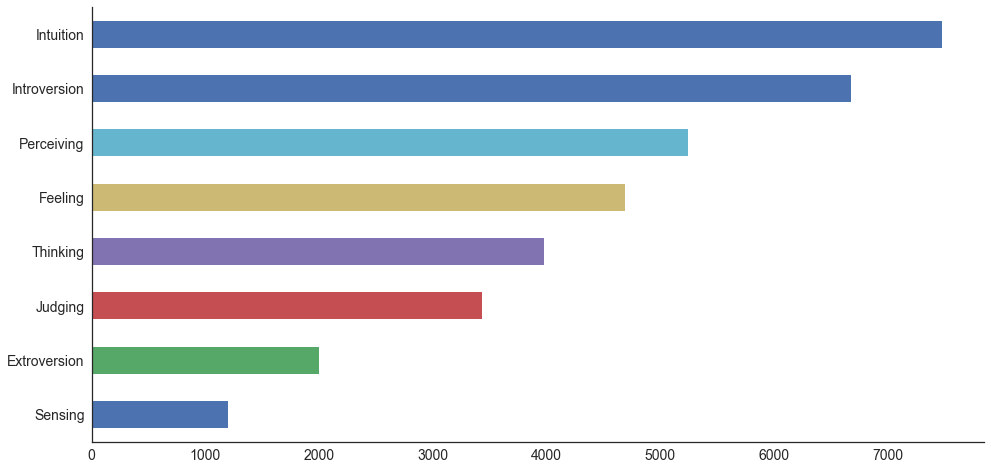

In [256]:
visualization_settings()
sns.set_style('white')
color_list = plt.cm.Set3(np.linspace(0, 1, 12))
_ = temp_df.sum().sort_values().rename(lambda x: mapping[x]).plot.barh()
sns.despine()

In [257]:
## Post length show us what length (how many chars) the posts are
df['post_length'] = df['posts'].map(len)

In [258]:
def get_types(person):
    selected_type=person['type']

    I = 0; N = 0
    T = 0; J = 0
    
    if selected_type[0] == 'I': 
        I = 1
    elif selected_type[0] == 'E': 
        I = 0
    else: print('I-E incorrect')
        
    if selected_type[1] == 'N': 
        N = 1
    elif selected_type[1] == 'S': 
        N = 0
    else: print('N-S incorrect')
        
    if selected_type[2] == 'T': 
        T = 1
    elif selected_type[2] == 'F': 
        T = 0
    else: print('T-F incorrect')
        
    if selected_type[3] == 'J': 
        J = 1
    elif selected_type[3] == 'P': 
        J = 0
    else: print('J-P incorrect')
    return pd.Series( {'IE':I, 'NS':N , 'TF': T, 'JP': J }) 

In [259]:
data = df.join(df.apply (lambda row: get_types (row), axis=1))

In [260]:
df= data
df.head()

type  \
0  INFJ   
1  ENTP   
2  INTP   
3  INTJ   
4  ENTJ   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     posts  \
0  'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206|||Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...|||84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04/round-home-design.jpg ...   
1  'I'm finding the lack of me in these posts very alarming.|||Sex can be boring if it's in the same position often. For example me and my girlfriend are currently in an environment where we have to creatively use cowgirl and missionary. There isn't enough...|||Giving new meaning to 'Game' theory.|||Hello *ENTP Grin*  That's all it takes. Than we converse and they do most of the flirting while I acknowledge their presence and return their words with smooth wordplay and more cheeky grins.|||This + Lack of Balance and Hand Eye Coordination.|||Real IQ test I score 127. Internet IQ tests are funny. I score 140s or higher.  Now, like the former responses of this thread I will mention that I don't believe in the IQ test. Before you banish...|||You know you're an ENTP when you vanish from a site for a year and a half, return, and find people are still commenting on your posts and liking your ideas/thoughts. You know you're an ENTP when you...|||http://img188.imageshack.us/img188/6422/6020d1f...   
2  'Good one  _____   https://www.youtube.com/watch?v=fHiGbolFFGw|||Of course, to which I say I know; that's my blessing and my curse.|||Does being absolutely positive that you and your best friend could be an amazing couple count? If so, than yes.   Or it's more I could be madly in love in case I reconciled my feelings (which at...|||No, I didn't; thank you for a link!|||So-called Ti-Si loop (and it can stem from any current topic/obsession) can be deadly. It's like when you're stuck in your own thoughts, and your mind just wanders in circles. Feels truly terrible. ...|||Have you noticed how peculiar vegetation can be? All you have to do is look down at the grass: dozens of different plant species there.    And now imagine that hundreds of years later (when/if soil...|||The Smiths – Never Had No One Ever|||I often find myself spotting faces on marble tiles/wood.|||This 5 year-old sentence is an incredibl

In [261]:
print ("Introversion (I) - Extroversion (E):\t", df['IE'].value_counts()[0], " / ", df['IE'].value_counts()[1])
print ("Intuition    (N) – Sensing      (S):\t", df['NS'].value_counts()[0], " / ", df['NS'].value_counts()[1])
print ("Thinking     (T) – Feeling      (F):\t", df['TF'].value_counts()[0], " / ", df['TF'].value_counts()[1])
print ("Judging      (J) – Perceiving   (P):\t", df['JP'].value_counts()[0], " / ", df['JP'].value_counts()[1])

Introversion (I) - Extroversion (E):	 1999  /  6676
Intuition    (N) – Sensing      (S):	 1197  /  7478
Thinking     (T) – Feeling      (F):	 4694  /  3981
Judging      (J) – Perceiving   (P):	 5241  /  3434


<Figure size 432x288 with 0 Axes>

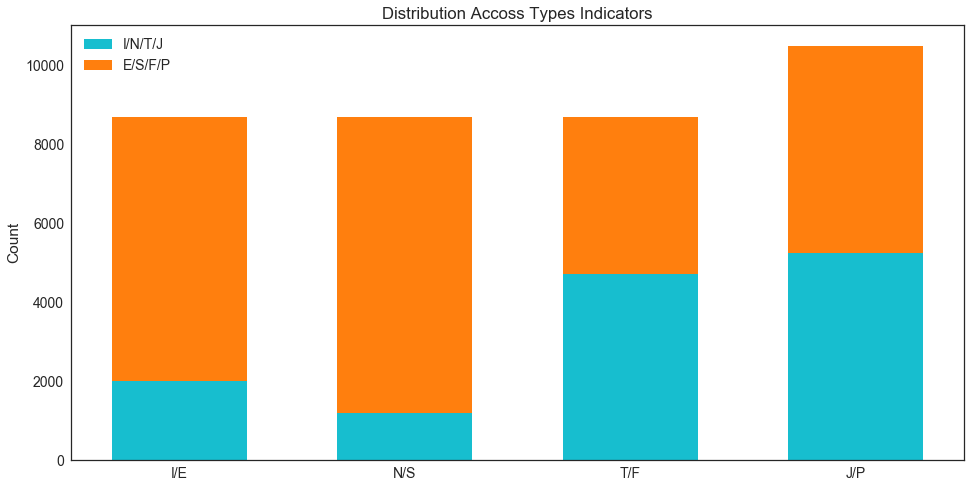

In [262]:
bottom_graphic = (df['IE'].value_counts()[0], df['NS'].value_counts()[0],df['TF'].value_counts()[0], df['JP'].value_counts()[0])
top_graphic =(df['IE'].value_counts()[1], df['NS'].value_counts()[1], df['TF'].value_counts()[1], df['JP'].value_counts()[0])

indis = np.arange(4) # There are 4 different couples such as IE NS TF JP
width = 0.6 
visualization_settings()
sns.set_style('white')
sns.despine(left=True, bottom=True)

plot_1 = plt.bar(indis, bottom_graphic, width, color=tableau20[18])
plot_2 = plt.bar(indis, top_graphic, width, bottom= bottom_graphic, color=tableau20[2])

plt.ylabel('Count')
plt.title('Distribution Accoss Types Indicators')
plt.xticks(indis, ('I/E',  'N/S', 'T/F', 'J/P',))
plt.legend((plot_1, plot_2), ('I/N/T/J', 'E/S/F/P'))

Let's check length of posts

Average Post Length:  7234.98962536023


<Figure size 432x288 with 0 Axes>

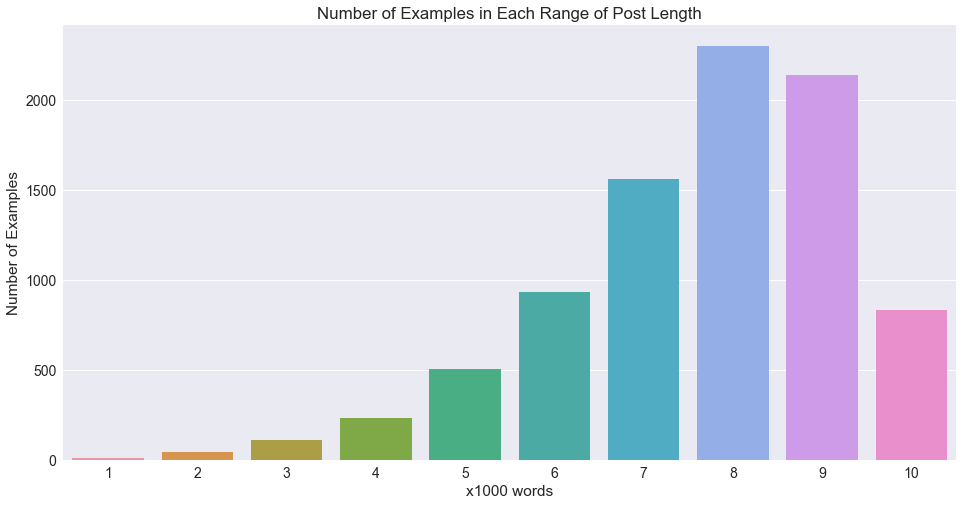

In [263]:
visualization_settings()
ranges = pd.cut(df['post_length'], 10, labels=np.arange(1, 11)) # split length into ranges (1-1000, 1001-2000)
cnt = ranges.value_counts()
plt.clf()
sns.barplot(cnt.index, cnt.values)
sns.set_style('white')
sns.despine()
plt.xlabel('x1000 words')
plt.ylabel('Number of Examples')
plt.title('Number of Examples in Each Range of Post Length')

print('Average Post Length: ', df['post_length'].mean()) # can be used to decide the no of features we should consider

In [264]:
post_length = df.groupby('type')['post_length'].mean().astype(int).sort_values(ascending=False)

## post_length shows the mean of post for each personality type

<Figure size 432x288 with 0 Axes>

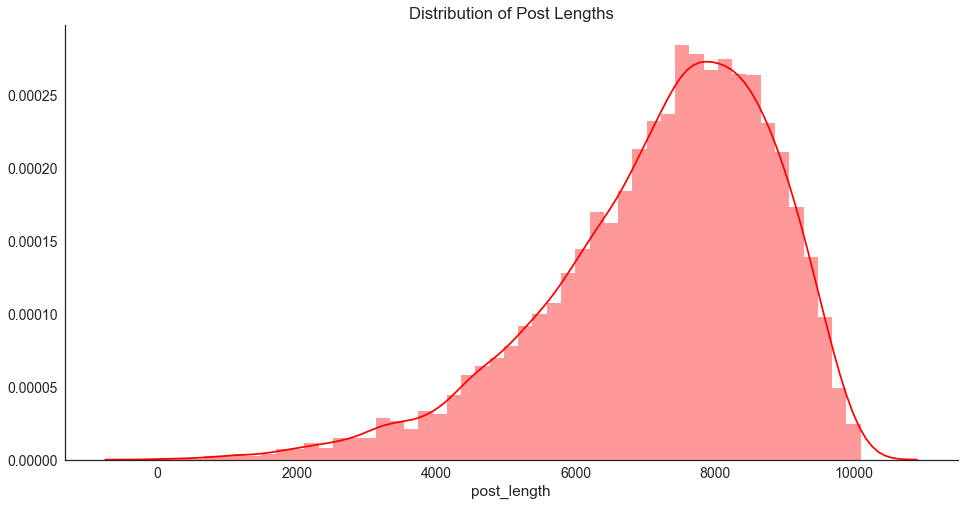

In [265]:
visualization_settings()
sns.set_style('white')
sns.distplot(df["post_length"], color='red').set_title("Distribution of Post Lengths")
sns.despine()

This graphic shows ditribution of post lengths for all people (Each person has 50 posts)

<Figure size 432x288 with 0 Axes>

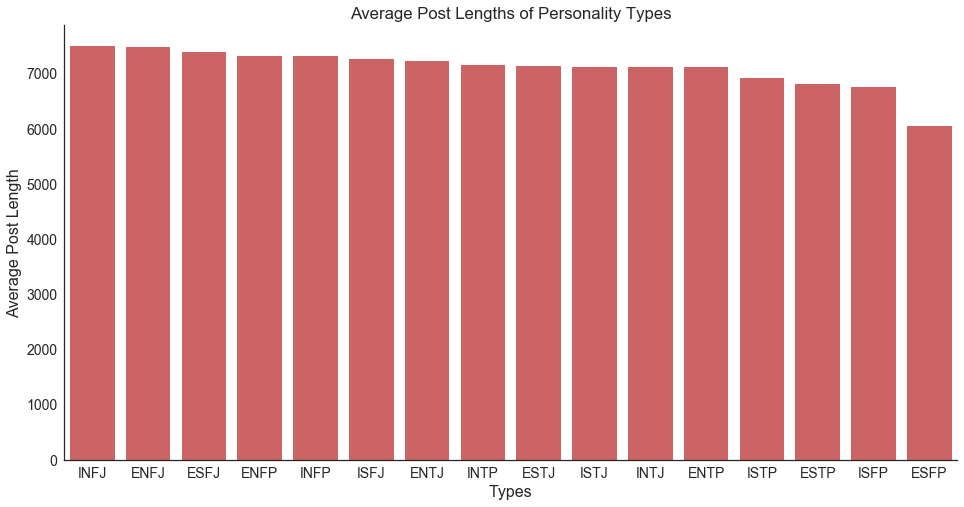

In [266]:
visualization_settings()
sns.set_style('white')
sns.barplot(post_length.index, post_length.values, alpha=0.8, color=tableau20[6])

# Label customizing
plt.ylabel('Average Post Length', fontsize=16)
plt.xlabel('Types', fontsize=16)
plt.title("Average Post Lengths of Personality Types")
sns.despine()
plt.show()

The graphic shows the __average of post length for each personality type__

In [267]:
## words_per_comment shows how many words there appears in each comment block for each user. Note that every user has 50 comments in our data set.
df['words_per_comment'] = df['posts'].map(lambda x : len(x.split())/50)

<Figure size 432x288 with 0 Axes>

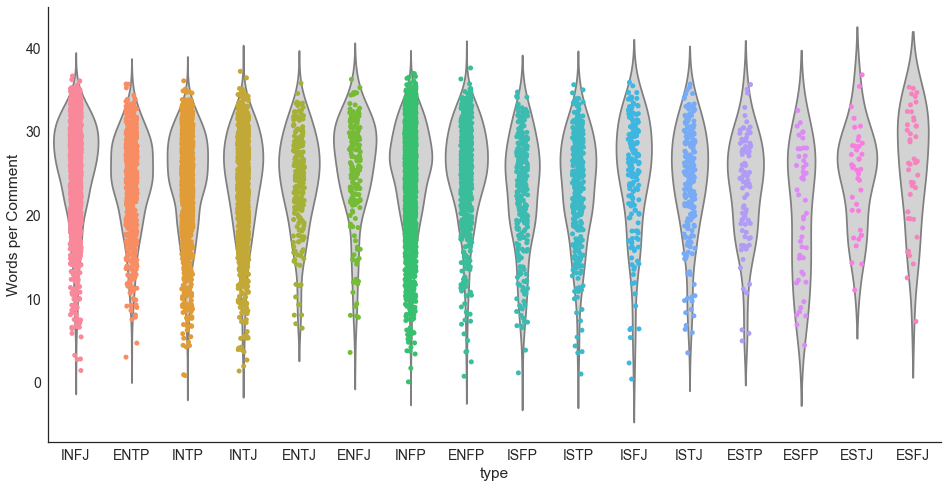

In [268]:
visualization_settings()
sns.set_style('white')
sns.violinplot(x='type', y='words_per_comment', data=df, inner=None, color='lightgray')
sns.stripplot(x='type', y='words_per_comment', data=df, size=5, jitter=True)
plt.ylabel('Words per Comment')
sns.despine()

#### As we can figure out from the graphic Extraversion personality type has less variance for words for each comment, particularly last 4 types are Extroversion.

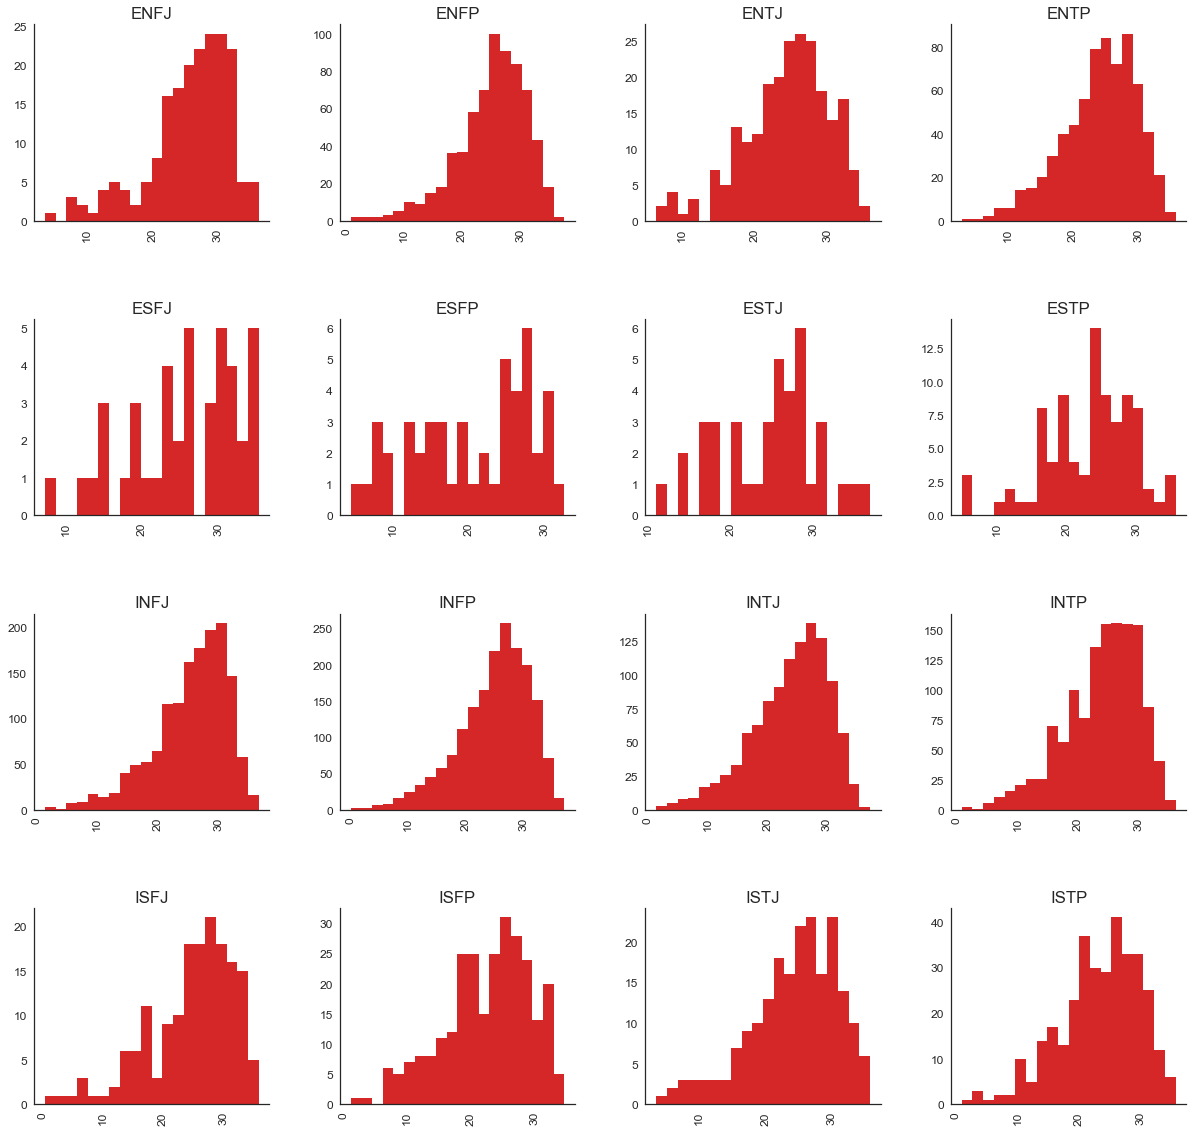

In [273]:
df.hist(column='words_per_comment', by = "type", grid=False, bins=20,xlabelsize=12, ylabelsize=12,figsize = (20,20), color=tableau20[6]) 
sns.despine()

## Feature Correlation

In [196]:
correlation = df[['IE', 'NS', 'TF', 'JP']].corr()
correlation

IE        NS        TF        JP
IE  1.000000 -0.045899 -0.069573  0.161939
NS -0.045899  1.000000 -0.080954  0.014922
TF -0.069573 -0.080954  1.000000 -0.004673
JP  0.161939  0.014922 -0.004673  1.000000

Let's see the correlation through heatmap

<Figure size 432x288 with 0 Axes>

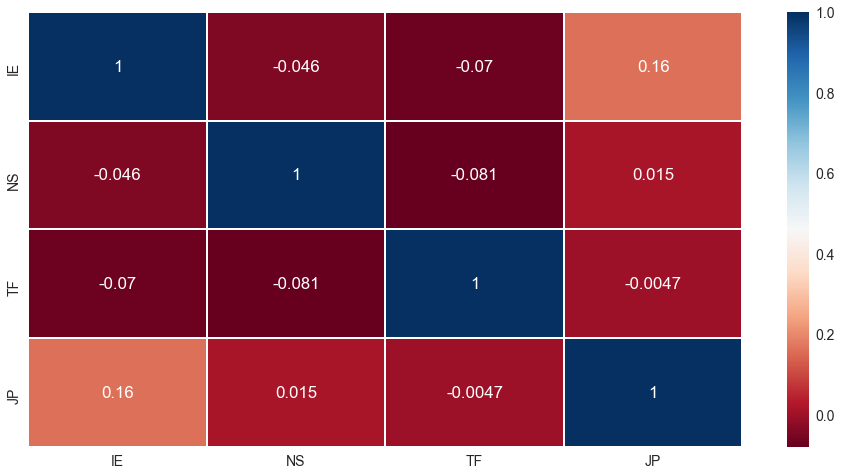

In [197]:
visualization_settings()
cmap=plt.cm.RdBu
sns.heatmap(correlation, cmap=cmap, annot=True, linewidths=1)

We cannot see strong correlation between traits of personal characteristics from above the heat map chart.

## World Cloud

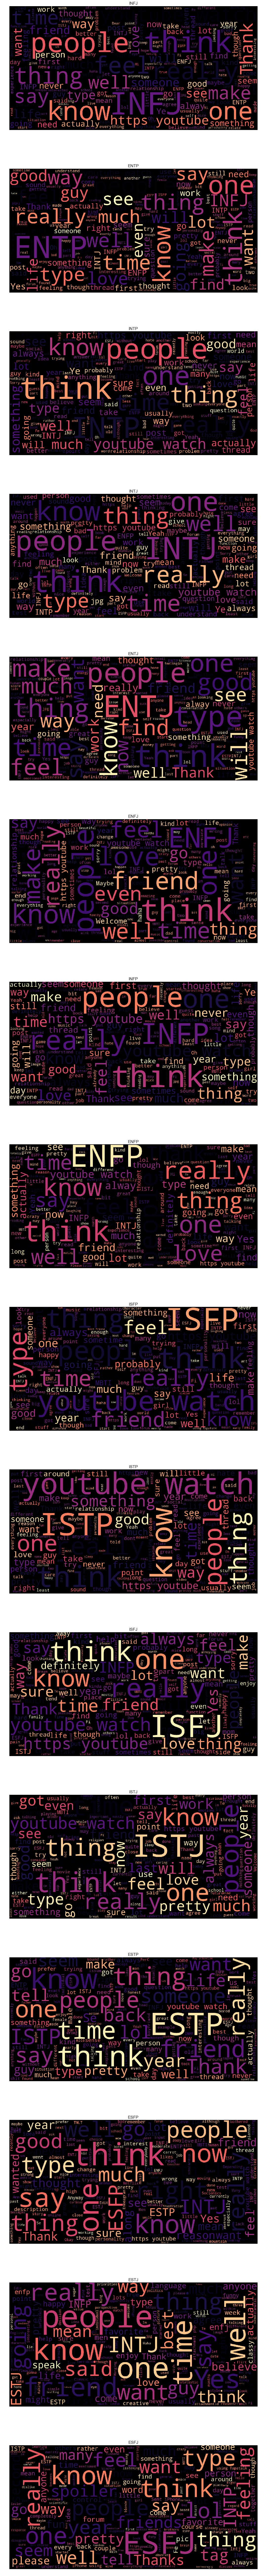

In [137]:
from scipy.misc import imread
from wordcloud import WordCloud, STOPWORDS

fig, ax = plt.subplots(len(df['type'].unique()), sharex=True, figsize=(18,12*len(df['type'].unique())))

k = 0
for i in df['type'].unique():
    df_temp = df[df['type'] == i]
    wordcloud = WordCloud(width=1600, height=800,max_font_size=200, colormap='magma').generate(df_temp['posts'].to_string())
    ax[k].imshow(wordcloud)
    ax[k].set_title(i)
    ax[k].axis("off")
    k+=1

In [236]:
###################################?????????????????????????????###############
df_2 = pd.DataFrame()
df_2 = df[:5]

## Data Preprocessing

In [237]:
def cleaning_text(dataframe):
    
    """[1] Find URLs"""
    """[2] Remove links from posts"""
    """[3] Keep only words"""
    """[4] Remove spaces more than 1 and lowercase the text"""
    """[5] Remove stopwords and lemmatizing"""
    """[6] Remove MBTI profiles from the posts"""
    
    # Creating stopwordlist and editing 
    stopword_list= stopwords.words('english')
    
    # "no" and "not" may give us information so those are removed from stop lists
    stopword_list.remove('no') 
    stopword_list.remove('not')
    
    # Creating MBTI list 
    unique_type_list = ['INFJ', 'ENTP', 'INTP', 'INTJ', 'ENTJ', 'ENFJ', 'INFP', 'ENFP',
                        'ISFP', 'ISTP', 'ISFJ', 'ISTJ', 'ESTP', 'ESFP', 'ESTJ', 'ESFJ']
  
    unique_type_list = [x.lower() for x in unique_type_list]

    for i in range(len(dataframe)):
        
        # [1] Find URLs
        urls = re.findall('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', dataframe['posts'][i])

        # [2] Remove urls and replace with "link" word
        dataframe['posts'][i] = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', 'link', dataframe['posts'][i])        
        
        # [3] Keep only words
        dataframe['posts'][i] = re.sub(r'[^a-zA-Z]',' ', dataframe['posts'][i])
        
        # [4] Remove spaces > 1 and lowercase the text
        dataframe['posts'][i] = re.sub(' +', ' ', dataframe['posts'][i]).lower()
        
        # [5] Remove stopwords and lemmatizing
        dataframe['posts'][i] = stemmer.stem(" ".join([w for w in dataframe['posts'][i].split(' ') if w not in stopword_list]))
        
        # [6] Remove MBTI profiles
        #for t in unique_type_list:
                #dataframe['posts'][i] = dataframe['posts'].replace(t,"")
        
    return dataframe  

In [238]:
 print("\nBefore preprocessing:\n\n", df_2['posts'].head(2))


Before preprocessing:

 0    'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206|||Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...|||84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010

In [239]:
df_2 = cleaning_text(df_2)
print("\nAfter preprocessing:\n\n", df_2['posts'].head())


After preprocessing:

 0     link link enfp intj moments link sportscenter not top ten plays link pranks life changing experience life link link repeat today may perc experience immerse last thing infj friend posted facebook committing suicide next day rest peace link hello enfj sorry hear distress natural relationship not perfection time every moment existence try figure hard times times growth link link welcome stuff link game set match prozac wellbrutin least thirty minutes moving legs mean moving sitting desk chair weed moderation maybe try edibles healthier alternative basically come three items determined type whichever types want would likely use given types cognitive functions whatnot left things moderation sims indeed video game good one note good one somewhat subjective not completely promoting death given sim dear enfp favorite video games growing current favorite video games cool link appears late sad someone everyone wait thought confidence good thing cherish time solitud

In [ ]:
print("\nList of urls:")
urls

## Splitting Into Train, Validation and Test Set

In [14]:
## Train, validation and test split 
## 60% is train set, 20% is test set and 20% is validation set

## First we split the data 80% as train set and 20% as test set

X_train, X_test, y_train, y_test = train_test_split(df[['posts']], df['type'], test_size=0.2, random_state=33)



## Next we split the train data as train data (60% of whole dataset) and 25% as validation data set 20% of whole data set)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=33)

In [15]:
print ('Train Set Shape\t\t:{}\nValidation Set Shape\t:{}\nTest Set Shape\t\t:{}'.format(X_train.shape, X_val.shape, X_test.shape))

Train Set Shape		:(5205, 1)
Validation Set Shape	:(1735, 1)
Test Set Shape		:(1735, 1)


In [16]:
X_train['post_length'] = X_train['posts'].map(len)